$\newcommand{\reals}{{\mathbb R}}
\newcommand{\indp}{\perp\kern-4pt\perp}
\newcommand{\given}{\,|\,}
$

## Problem 2: Are you Schur? (10 points)

The graphical lasso is based on conditional independence properties
of Gaussian distributions. This problem asks you to reason about the graphs
underlying a multivariate Gaussian.

Let $X = (Y,Z) \in \reals^6 \sim N(0, \Sigma)$ be a random
Gaussian vector where $Y = (Y_1,Y_2) \in\reals^2$ and
$Z = (Z_1,Z_2,Z_3,Z_4) \in\reals^4$, with
$\Sigma^{-1} = \Omega =  \begin{pmatrix}
A & B \\
B^T & C
\end{pmatrix}
$
where
$$
A = \begin{pmatrix} 2 & 0 \\ 0 & 2\end{pmatrix} \qquad
B = \begin{pmatrix} 1 & \frac{1}{2} & \frac{1}{3} & \frac{1}{4} \\[1pt]
                     -1 & \frac{1}{2} & -\frac{1}{3} & \frac{1}{4}
\end{pmatrix} \qquad
C = \begin{pmatrix}
2 & \frac{1}{2} & 0 & 0 \\
\frac{1}{2} & 2 & 0 & 0 \\
0 & 0 & 2 & \frac{1}{2} \\
0 & 0 & \frac{1}{2} & 2
\end{pmatrix}.
$$

### Problem 2.1

Draw the undirected graph of $X$, arranging the vertices in a hexagon. Explain your answer.

<br>

![](https://rstr.in/avjn9edat3zttr/my-library/MQCW4LKmlt-)

### Problem 2.2

Draw the undirected graph of $Z$, arranging the vertices in a square.  Explain your answer.
Hint:  The
[Schur complement](https://en.wikipedia.org/wiki/Schur_complement)
$ S= C  - B^T A^{-1} B$ has the property that

\begin{equation*}
\begin{pmatrix}
A & B \\
B^T & C
\end{pmatrix}^{-1}
\;=\;
\begin{pmatrix}
A^{-1} + A^{-1} B S^{-1} B ^T A^{-1} & - A^{-1} B S^{-1}  \\
- S^{-1} B^T A^{-1} & S^{-1}
\end{pmatrix}
\end{equation*}


<br>

![](https://rstr.in/avjn9edat3zttr/my-library/2F7oY_BOTZS)

### Problem 2.3

Write down the set of all conditional independence relations on the undirected graph of $X$.

![](https://rstr.in/avjn9edat3zttr/my-library/Y2SPb4VUEyl)

## Problem 3: Taking stock (15 points)

A joint distribution of data has a natural graph associated with it. When the distribution is multivariate normal, this graph is encoded in the pattern of zeros and non-zeros in the inverse of the covariance matrix, also known as the "precision matrix."

In class we demonstrated the graphical lasso for estimating the graph on ETF data.
In this problem you will construct two different "portolios" of stocks,
and run the graphical lasso to estimate a graph, commenting on your results.

All of the code you might need for this is contained in the demo.


### Downloading data

As demonstrated in class, you will run on equities data downloaded from Yahoo finance.
Your job is to construct two "portfolios" of stocks, each of which has some kind of organization to it. For example, in one portfolio you might have 5 energy stocks, 5 tech stocks, 5 consumer staples stocks, and 5 ETF stocks. Each portfolio should have at least 20 stocks.

The page https://en.wikipedia.org/wiki/List_of_S%26P_500_companies has GICS sectors, which you may find useful for the glasso problem.

To download the data, follow the procedure outlined below (and discussed briefly in class):

  * Search on a ticker symbol, like EZA, using [https://finance.yahoo.com/quote/EZA/history?p=EZA](https://finance.yahoo.com/quote/EZA/history?p=EZA)
  * Select the range of the query, the frequency (daily, weekly, or monthly) and then issue the query. This will give you results like this:
  
 ![ezh](https://raw.githubusercontent.com/YData123/sds365-sp22/main/demos/graphs/ezh.png)

  * Next, hover over the Download link, and grab the URL. In this case it gives
  https://query1.finance.yahoo.com/v7/finance/download/EZA?period1=1044576000&period2=1648080000&interval=1d&events=history&includeAdjustedClose=true
  
  * Then, you can use this same URL, but swap in different ticker symbols, to get the corresponding data for range of companies or funds.  


### Analyzing  your portfolios

Your task is to analyze each porfolio using the graphical lasso, and comment on your findings.
Here are the types of questions you should address:

* How did you choose the portolio? How did you choose the date range and frequency (daily, weekly, etc.)? Remember, each of the portfolios must contain at least 20 stocks, and be organized in some reasonable way.

* Display the graph obtained with the graphical lasso, using networkx. How did you choose the regularization level? Does the structure of the graph make sense? Is it sensitive to the choice of regularization level? Is this the structure you expected to see when you designed the portfolio? Why or why not?

* What are some of the conditional independence assumptions implied by the graph? Are some parts of the graph more densely connected than others? Why?




In [274]:
import numpy as np
import pandas as pd
from sklearn.covariance import GraphicalLasso, GraphicalLassoCV
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx
from IPython.display import clear_output
from time import sleep

In [346]:
#!pip install yfinance

# Portfolio 1

In [198]:
import yfinance as yf
import os

airlinetickers = ['AAL', 'ALK', 'DAL', 'LUV', 'UAL']
semiconductortickers = ['AMD', 'INTC', 'NVDA', 'QCOM', 'TER']
financetickers = ['BLK', 'BAC', 'SCHW', 'C', 'MS']
pharmatickers = ['JNJ', 'PFE', 'BMY', 'ABBV', 'LLY']

industries = [airlinetickers, semiconductortickers, financetickers, pharmatickers]

# download_dir = os.path.join(os.path.expanduser("~"), "Downloads")

# for tickers in industries:
#     for ticker in tickers:
#         stock = yf.Ticker(ticker)
#         data = stock.history(period="10y") 
#         file_path = os.path.join(download_dir, f"{ticker}.csv")
#         data.to_csv(file_path)

In [275]:
import pandas as pd
import os

# Define the path to the Portfolio folder and the sub-folders for each industry
portfolio_dir = '/Users/aj/Downloads/Portfolio'
industry_folders = ['airlinetickers', 'semiconductortickers', 'financetickers', 'pharmatickers']

# Dictionary to hold data
data_dict = {}


for industry_folder in industry_folders:
    industry_dir = os.path.join(portfolio_dir, industry_folder)
    for file_name in os.listdir(industry_dir):
        if file_name.endswith('.csv'):
            ticker = file_name.split('.')[0]  
            file_path = os.path.join(industry_dir, file_name)
            data = pd.read_csv(file_path, index_col='Date', parse_dates=True)
            data_dict[ticker] = data['Close']  

combined_data = pd.DataFrame(data_dict)


In [276]:
df = combined_data
df = df.iloc[::5, :]

In [277]:
dflogreturn = np.log1p(df.pct_change()).iloc[1:]
dflogreturn

,UAL,ALK,AAL,LUV,DAL,TER,INTC,AMD,NVDA,QCOM,C,BAC,SCHW,MS,BLK,LLY,ABBV,PFE,BMY,JNJ
Date,,,,,,,,,,,,,,,,,,,,
2013-11-04 00:00:00-05:00,0.109865,0.037376,0.031309,0.044045,0.050785,0.010393,-0.004113,0.000000,-0.025975,0.014916,-0.030578,-0.013442,0.009516,0.014419,-0.016212,-0.009280,-0.013445,0.016775,0.019418,0.006903
2013-11-11 00:00:00-05:00,-0.015177,0.007938,0.024360,-0.003363,0.001093,-0.015630,0.005600,0.006006,0.057046,-0.028430,0.031176,0.025318,0.035189,0.025241,-0.004260,-0.002583,-0.003904,0.007072,-0.008711,0.013453
2013-11-18 00:00:00-05:00,0.029853,0.035616,0.047418,0.018359,0.023387,-0.008790,0.017634,0.038184,0.005720,0.061929,0.012283,0.035474,0.017349,0.007944,0.005774,0.024643,0.006157,0.024349,-0.013788,0.000106
2013-11-25 00:00:00-05:00,0.090601,0.028218,-0.006579,0.022350,0.036659,-0.001178,-0.035164,-0.023325,-0.011857,0.007616,0.048049,0.057940,0.010591,0.039119,-0.007662,0.006056,-0.009457,0.004053,0.018910,0.020963
2013-12-03 00:00:00-05:00,-0.069119,-0.027823,-0.079390,-0.014662,-0.039152,-0.003542,-0.008457,0.065644,0.014720,0.016012,-0.022008,-0.017225,-0.000405,-0.018238,-0.005223,-0.030857,0.031716,-0.029042,-0.036417,-0.017511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-27 00:00:00-04:00,-0.053955,-0.058668,-0.035064,-0.061831,-0.058794,0.005092,-0.002309,-0.022883,0.005407,-0.000275,-0.044473,-0.045870,-0.041248,-0.065074,-0.060446,-0.035523,-0.003130,-0.046265,-0.015257,-0.036252
2023-10-04 00:00:00-04:00,-0.014861,-0.007720,0.009471,0.014442,-0.016502,0.038531,0.037430,0.059382,0.036370,0.006026,-0.016196,-0.050001,-0.056164,-0.031855,-0.010719,-0.033854,-0.036172,0.037002,-0.020241,-0.010172
2023-10-11 00:00:00-04:00,-0.009950,-0.044716,-0.019834,-0.037458,0.000574,-0.007106,0.026097,0.039934,0.060890,0.011495,0.042298,0.040791,0.009679,-0.002405,0.009600,0.130063,0.011110,-0.006022,0.008687,0.004235


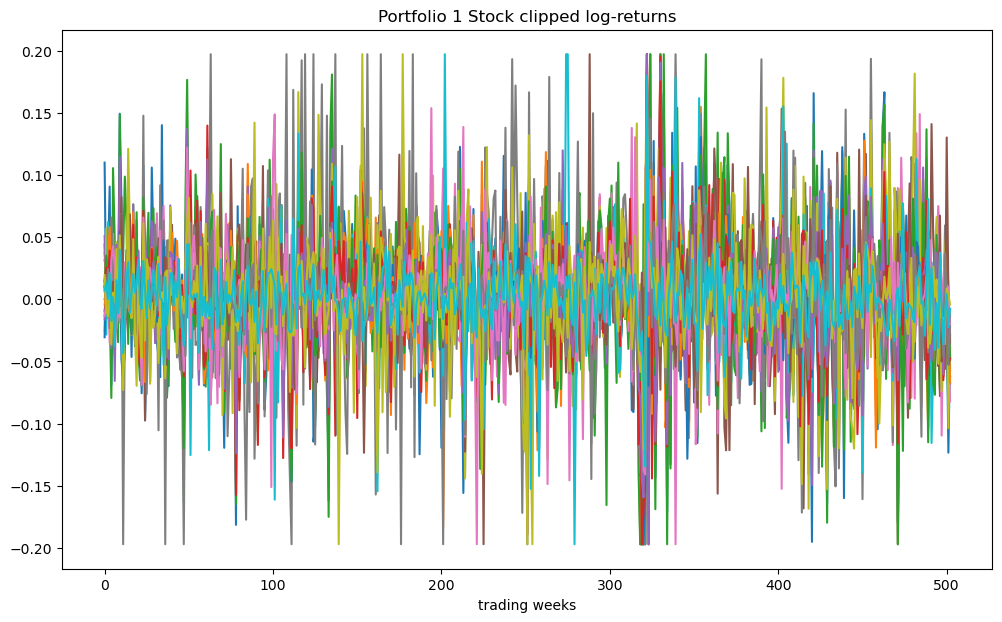

In [409]:
logreturns = np.array(np.log1p(df.pct_change()).iloc[1:])
clipped_logreturns = np.maximum(logreturns, -4*np.std(logreturns))
clipped_logreturns = np.minimum(clipped_logreturns, 4*np.nanstd(logreturns))

plt.figure(figsize=(12, 7))
plt.plot(clipped_logreturns)
plt.xlabel('trading weeks')
_ = plt.title('Portfolio 1 Stock clipped log-returns')


/Users/aj/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


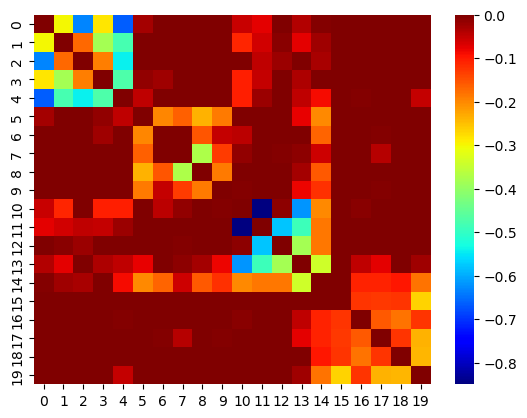

In [370]:
from sklearn.covariance import GraphicalLassoCV

X = np.array(clipped_logreturns)
p = X.shape[1]
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)  # Standardizing the data

glasso_cv = GraphicalLassoCV().fit(X)

Omegahat = np.around(glasso_cv.precision_, decimals=5)

for j in np.arange(p):
    Omegahat[j, j] = 0

sns.heatmap(Omegahat, cmap='jet')
plt.show()


In [371]:
print(glasso_cv.alpha_)

0.18775995770475476


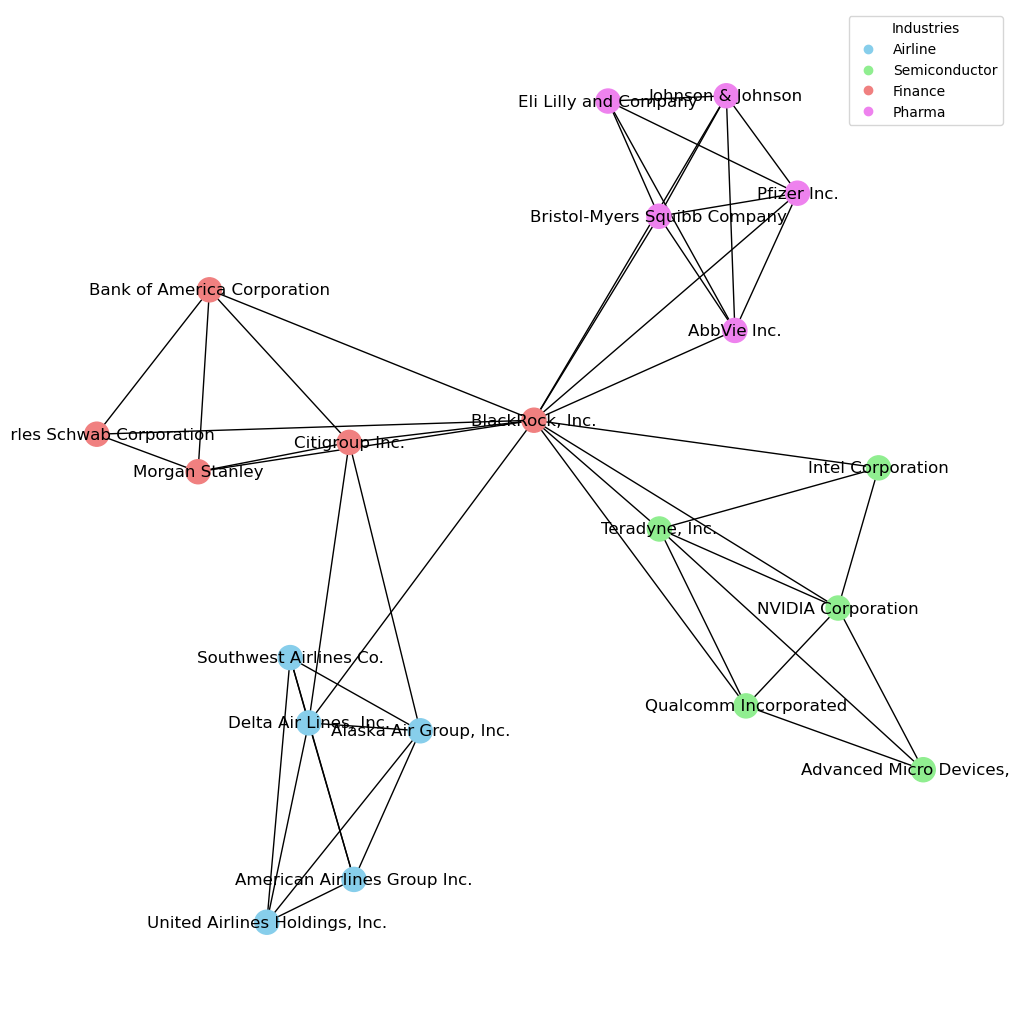

In [337]:
np.random.seed(2)

tickers_by_company_name = {
    'AAL': 'American Airlines Group Inc.',
    'ALK': 'Alaska Air Group, Inc.',
    'DAL': 'Delta Air Lines, Inc.',
    'LUV': 'Southwest Airlines Co.',
    'UAL': 'United Airlines Holdings, Inc.',
    'AMD': 'Advanced Micro Devices, Inc.',
    'INTC': 'Intel Corporation',
    'NVDA': 'NVIDIA Corporation',
    'QCOM': 'Qualcomm Incorporated',
    'TER': 'Teradyne, Inc.',
    'BLK': 'BlackRock, Inc.',
    'BAC': 'Bank of America Corporation',
    'SCHW': 'Charles Schwab Corporation',
    'C': 'Citigroup Inc.',
    'MS': 'Morgan Stanley',
    'JNJ': 'Johnson & Johnson',
    'PFE': 'Pfizer Inc.',
    'BMY': 'Bristol-Myers Squibb Company',
    'ABBV': 'AbbVie Inc.',
    'LLY': 'Eli Lilly and Company'
}

tickers_by_industry = {
    'AAL': 'Airline',
    'ALK': 'Airline',
    'DAL': 'Airline',
    'LUV': 'Airline',
    'UAL': 'Airline',
    'AMD': 'Semiconductor',
    'INTC': 'Semiconductor',
    'NVDA': 'Semiconductor',
    'QCOM': 'Semiconductor',
    'TER': 'Semiconductor',
    'BLK': 'Finance',
    'BAC': 'Finance',
    'SCHW': 'Finance',
    'C': 'Finance',
    'MS': 'Finance',
    'JNJ': 'Pharma',
    'PFE': 'Pharma',
    'BMY': 'Pharma',
    'ABBV': 'Pharma',
    'LLY': 'Pharma'
}

industry_colors = {
    'Airline': 'skyblue',
    'Semiconductor': 'lightgreen',
    'Finance': 'lightcoral',
    'Pharma': 'violet'
}

stocks = [tickers_by_company_name[c] for c in dflogreturn.columns]
precdf = pd.DataFrame(Omegahat, columns=stocks, index=stocks)
links = precdf.stack().reset_index()
links.columns = ['var1', 'var2','value']
links=links.loc[(abs(links['value']) > 0.1) &  (links['var1'] != links['var2']) ]

ticker_to_color = {ticker: industry_colors[industry] for ticker, industry in tickers_by_industry.items()}

node_color = [ticker_to_color[ticker] for ticker in dflogreturn.columns]

G = nx.from_pandas_edgelist(links, 'var1', 'var2', create_using=nx.Graph())

company_to_ticker = {v: k for k, v in tickers_by_company_name.items()}

node_color = [ticker_to_color[company_to_ticker[node]] for node in G.nodes()]

pos = nx.spring_layout(G, k=1.7/np.sqrt(len(G.nodes())), iterations=20)
plt.figure(3, figsize=(10, 10))
nx.draw(G, pos=pos, node_color=node_color, with_labels=True)

# legend
legend_handles = [plt.Line2D([0], [0], marker='o', color=color, label=industry, linestyle='None')
                  for industry, color in industry_colors.items()]
plt.legend(handles=legend_handles, title="Industries", loc='best')

plt.show()

* How did you choose the portolio? How did you choose the date range and frequency (daily, weekly, etc.)? Remember, each of the portfolios must contain at least 20 stocks, and be organized in some reasonable way.

I chose the portfolio such that it had diversification but everything would still be linked through the financials sector. Although I underestimated the dominance of BlackRock in facilitating this, I felt that linking 3 seemingly independent industries through finance would be interesting to see. I chose a date range of 10 years to cancel out correlations caused by overall global conditions and I seperated by every 5 days, signifying a trading week, as I felt it would be good to cancel out noise.

* Display the graph obtained with the graphical lasso, using networkx. How did you choose the regularization level? Does the structure of the graph make sense? Is it sensitive to the choice of regularization level? Is this the structure you expected to see when you designed the portfolio? Why or why not?

I utilized GlassoCV in order to get the ideal alpha regularization value. The structure of the graph makes sense and is highly sensitive to the choice of regularization. This is indeed the stucture I expected as I did expect to see the clusters diversified and I knew of the massive scale and holdings of BlackRock in every sector and thus this graph makes sense. In addition the connections between Delta, Alaska, and Citigroup are as a result of citigroup owning a significant share in those companies.


* What are some of the conditional independence assumptions implied by the graph? Are some parts of the graph more densely connected than others? Why?

We see an evident and prominent conditional independence between many companies across sectors where they are all conditionally independent given blackrock. This is likely due to the fact that BlackRock is one of the largest stakeholders in the world and they have holdings in nearly every sector.

The graph is clearly and evidently densely connected into clusters representative of separate industries as the companies in the same sector tend to correlate strongly among themselves. In addition, Airlines and Pharma form denser clusters than Semiconductors and Financials as the latter tend to have greater diversification in their clients among their own sector due to their diverse services provided and industries served by companies in either sector.

# Portfolio 2

In [389]:
import yfinance as yf
import os

automotivetickers = ['F', 'GM', 'AZO', 'KMX', 'ORLY']
homeconstructiontickers = ['FAST', 'TT', 'AOS', 'JCI', 'MAS']
energytickers = ['ED', 'AEP', 'LNT', 'D', 'DUK']
lifeinsurancetickers = ['AFL', 'GL', 'MET', 'PFG', 'PRU']

industries2 = [automotivetickers, homeconstructiontickers, energytickers, lifeinsurancetickers]

# download_dir = os.path.join(os.path.expanduser("~"), "Downloads")

# for tickers in industries2:
#     for ticker in tickers:
#         stock = yf.Ticker(ticker)
#         data = stock.history(period="10y") 
#         file_path = os.path.join(download_dir, f"{ticker}.csv")
#         data.to_csv(file_path)

In [390]:
import pandas as pd
import os

# Define the path to the Portfolio folder and the sub-folders for each industry
portfolio2_dir = '/Users/aj/Downloads/Portfolio2'
industry2_folders = ['automotivetickers', 'homeconstructiontickers', 'energytickers', 'lifeinsurancetickers']

# Dictionary to hold data
data_dict2 = {}


for industry2_folder in industry2_folders:
    industry2_dir = os.path.join(portfolio2_dir, industry2_folder)
    for file_name in os.listdir(industry2_dir):
        if file_name.endswith('.csv'):
            ticker = file_name.split('.')[0]  
            file_path = os.path.join(industry2_dir, file_name)
            data = pd.read_csv(file_path, index_col='Date', parse_dates=True)
            data_dict2[ticker] = data['Close']  

combined_data2 = pd.DataFrame(data_dict2)


In [391]:
df2 = combined_data2
df2 = df2.iloc[::5, :]
df2logreturn = np.log1p(df2.pct_change()).iloc[1:]
df2logreturn

,F,GM,KMX,AZO,ORLY,FAST,MAS,AOS,JCI,TT,LNT,D,ED,DUK,AEP,MET,GL,AFL,PFG,PRU
Date,,,,,,,,,,,,,,,,,,,,
2013-11-11 00:00:00-05:00,-0.006492,-0.021309,0.003287,0.025513,-0.000322,-0.102602,-0.034853,0.014457,0.004902,-0.003403,0.007587,0.029108,-0.015178,-0.000276,0.008886,0.043100,0.016064,0.009485,0.007502,0.058567
2013-11-18 00:00:00-05:00,0.005314,0.050244,0.006949,0.025945,0.002252,0.001280,0.025293,0.014437,0.021234,0.001629,0.006780,0.028727,0.018550,-0.001705,0.025572,0.044678,0.014879,0.023902,0.022376,0.024667
2013-11-25 00:00:00-05:00,-0.002358,-0.026801,0.019962,0.013272,0.006406,-0.002990,0.043240,0.014965,0.021835,0.035040,-0.019712,-0.021618,-0.041381,-0.007718,-0.016064,0.004971,0.004778,-0.010217,0.016310,0.012415
2013-12-03 00:00:00-05:00,-0.022688,0.015590,0.021332,-0.011207,-0.007371,0.012119,0.000460,-0.024129,-0.014943,0.002277,-0.008072,-0.023793,-0.010075,-0.017622,-0.014404,-0.021199,-0.003714,-0.010322,-0.007417,-0.016612
2013-12-10 00:00:00-05:00,-0.001813,0.057566,0.017820,0.024348,0.005293,0.009883,-0.011096,-0.006597,-0.008755,0.011357,-0.010476,-0.011384,-0.008353,-0.006905,-0.015264,0.009885,0.016999,0.011076,-0.004436,0.014368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-04 00:00:00-04:00,-0.032817,-0.041337,-0.155846,-0.017188,-0.018738,-0.000727,-0.017441,0.011998,-0.044618,0.001648,-0.022075,-0.079878,-0.028451,-0.045067,-0.034465,-0.045610,-0.000731,-0.012541,-0.051732,-0.035866
2023-10-11 00:00:00-04:00,0.021453,-0.001935,0.013257,0.029299,0.021185,0.017833,0.025303,0.070662,0.023682,0.053013,0.045285,0.023314,0.049243,0.042623,0.026790,0.046406,0.037545,0.047870,0.032804,0.039457
2023-10-18 00:00:00-04:00,-0.041673,-0.049630,-0.063324,0.022126,0.015258,0.048442,-0.054409,-0.037551,-0.055233,-0.075266,0.002613,-0.052568,-0.001924,-0.018871,-0.001462,0.003653,0.012891,0.006869,-0.000566,-0.000527


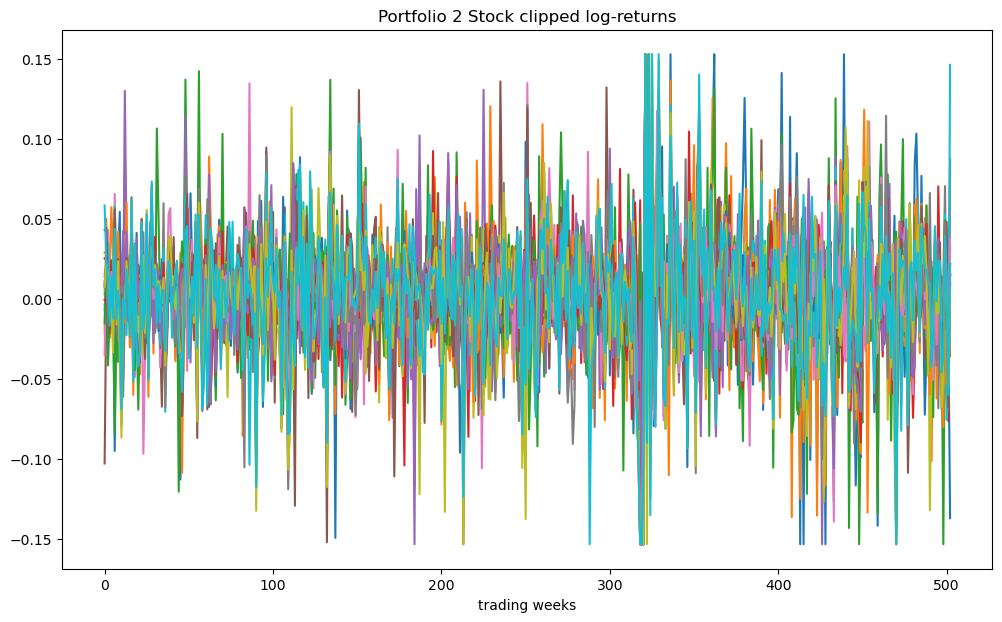

In [410]:
logreturns2 = np.array(np.log1p(df2.pct_change()).iloc[1:])
clipped_logreturns2 = np.maximum(logreturns2, -4*np.nanstd(logreturns2))
clipped_logreturns2 = np.minimum(clipped_logreturns2, 4*np.nanstd(logreturns2))
plt.figure(figsize=(12, 7))
plt.plot(clipped_logreturns2)
plt.xlabel('trading weeks')
_ = plt.title('Portfolio 2 Stock clipped log-returns')


/Users/aj/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


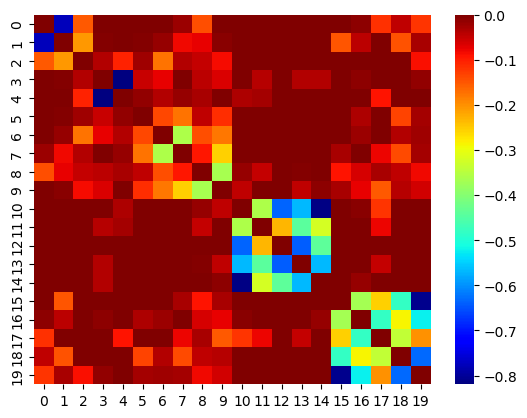

0.1951088329889457


In [393]:
X2 = np.array(clipped_logreturns2)
p2 = X2.shape[1]
X2 = (X2 - np.mean(X2, axis=0)) / np.std(X2, axis=0)

glasso_cv2 = GraphicalLassoCV().fit(X2)

Omegahat2 = np.around(glasso_cv2.precision_, decimals=5)

for j in np.arange(p2):
    Omegahat2[j, j] = 0

sns.heatmap(Omegahat2, cmap='jet')
plt.show()
print(glasso_cv2.alpha_)

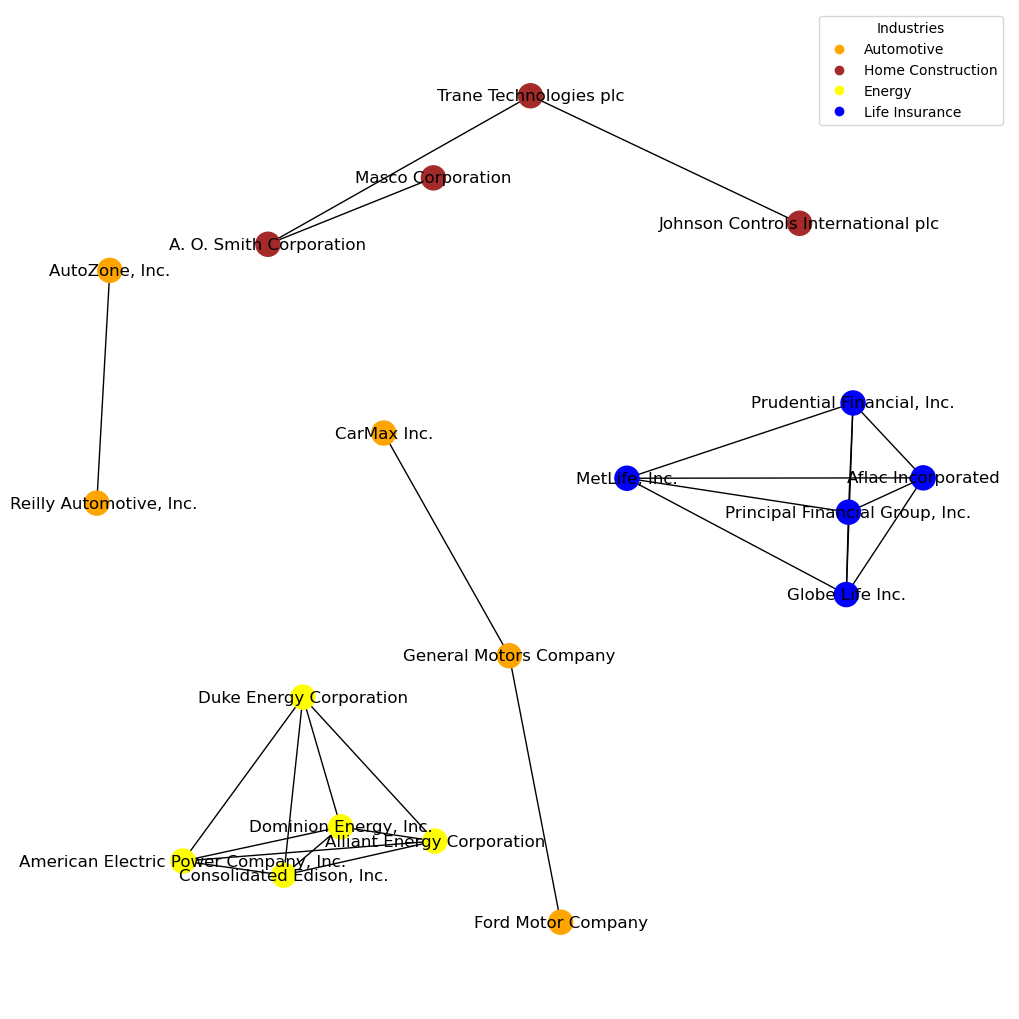

In [402]:
np.random.seed(2)

tickers_by_company_name = {
    'F': 'Ford Motor Company',
    'GM': 'General Motors Company',
    'AZO': 'AutoZone, Inc.',
    'KMX': 'CarMax Inc.',
    'ORLY': 'OReilly Automotive, Inc.',
    'FAST': 'Fastenal',
    'TT': 'Trane Technologies plc',
    'AOS': 'A. O. Smith Corporation',
    'JCI': 'Johnson Controls International plc',
    'MAS': 'Masco Corporation',
    'ED': 'Consolidated Edison, Inc.',
    'AEP': 'American Electric Power Company, Inc.',
    'LNT': 'Alliant Energy Corporation',
    'D': 'Dominion Energy, Inc.',
    'DUK': 'Duke Energy Corporation',
    'AFL': 'Aflac Incorporated',
    'GL': 'Globe Life Inc.',
    'MET': 'MetLife, Inc.',
    'PFG': 'Principal Financial Group, Inc.',
    'PRU': 'Prudential Financial, Inc.'
}

tickers_by_industry = {
    'F': 'Automotive',
    'GM': 'Automotive',
    'AZO': 'Automotive',
    'KMX': 'Automotive',
    'ORLY': 'Automotive',
    'FAST': 'Home Construction',
    'TT': 'Home Construction',
    'AOS': 'Home Construction',
    'JCI': 'Home Construction',
    'MAS': 'Home Construction',
    'ED': 'Energy',
    'AEP': 'Energy',
    'LNT': 'Energy',
    'D': 'Energy',
    'DUK': 'Energy',
    'AFL': 'Life Insurance',
    'GL': 'Life Insurance',
    'MET': 'Life Insurance',
    'PFG': 'Life Insurance',
    'PRU': 'Life Insurance'
}

industry_colors = {
    'Automotive': 'orange',
    'Home Construction': 'brown',
    'Energy': 'yellow',
    'Life Insurance': 'blue'
}


stocks = [tickers_by_company_name[c] for c in df2logreturn.columns]
precdf = pd.DataFrame(Omegahat2, columns=stocks, index=stocks)
links = precdf.stack().reset_index()
links.columns = ['var1', 'var2','value']
links=links.loc[(abs(links['value']) > 0.2) &  (links['var1'] != links['var2']) ]

ticker_to_color = {ticker: industry_colors[industry] for ticker, industry in tickers_by_industry.items()}

node_color = [ticker_to_color[ticker] for ticker in df2logreturn.columns]

G = nx.from_pandas_edgelist(links, 'var1', 'var2', create_using=nx.Graph())

company_to_ticker = {v: k for k, v in tickers_by_company_name.items()}

node_color = [ticker_to_color[company_to_ticker[node]] for node in G.nodes()]

pos = nx.spring_layout(G, k=1.7/np.sqrt(len(G.nodes())), iterations=20)
plt.figure(3, figsize=(10, 10))
nx.draw(G, pos=pos, node_color=node_color, with_labels=True)

# legend
legend_handles = [plt.Line2D([0], [0], marker='o', color=color, label=industry, linestyle='None')
                  for industry, color in industry_colors.items()]
plt.legend(handles=legend_handles, title="Industries", loc='best')

plt.show()

* How did you choose the portolio? How did you choose the date range and frequency (daily, weekly, etc.)? Remember, each of the portfolios must contain at least 20 stocks, and be organized in some reasonable way.

This portfolio consisted of 20 companies divided equally across the four sectors: Automotive, Home Construction, Energy, and Life Insurance. I chose these in particular as I felt they were quite distinguished from each other and I wanted to demonstrate a well-diversified portfolio unlike the previous one in which the financial firms like Blackrock and Citigroup linked outside of their sector quite strongly. I chose a date range of 10 years to cancel out correlations caused by overall global conditions and I seperated by every 5 days, signifying a trading week, as I felt it would be good to cancel out noise.

* Display the graph obtained with the graphical lasso, using networkx. How did you choose the regularization level? Does the structure of the graph make sense? Is it sensitive to the choice of regularization level? Is this the structure you expected to see when you designed the portfolio? Why or why not?

I chose the regularization parameter through GlassoCV as I wanted to make it as close to the optimal value as possible. The structure of the graph makes sense as it indeed shows that the industries are quite independent of one another as I had hoped. The graph was quite sensitive to the choice of regularization level.

* What are some of the conditional independence assumptions implied by the graph? Are some parts of the graph more densely connected than others? Why?


The sectors seperate themselves with certain sectors more closely interlinked than others. It is also sensical that O'Reilly and Autozone are seperate from Carmax, General Motors, and Ford, as the former are for car repair and maintence whereas the latter's price relates to people buying cars. Life Insurance and Energy are interlinked as a no-brainer as all those companies in the sectors offer functionally the same services. The Home Construction Sector was a bit surprising to present as it did. It might be due to each of the companies specializing in unique and different products from each other but some components require others to function. For example, Johnson Controls and Trane HVACs.